In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.tree import DecisionTreeClassifier
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#loading up the csv provided
data_raw = pd.read_csv('climate_nasa.csv')
print(data_raw)

                         date  likesCount  \
0    2022-09-07T17:12:32.000Z           2   
1    2022-09-08T14:51:13.000Z           0   
2    2022-09-07T17:19:41.000Z           1   
3    2022-09-08T00:51:30.000Z           4   
4    2022-09-07T19:06:20.000Z          16   
..                        ...         ...   
517  2022-12-22T17:21:37.000Z           0   
518  2022-12-22T17:19:51.000Z           1   
519  2022-12-22T17:12:57.000Z           3   
520  2022-12-22T17:01:12.000Z           1   
521  2022-12-22T17:00:08.000Z          12   

                                           profileName  commentsCount  \
0    4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1    518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2    d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3    37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4    e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   
..                   

In [4]:
#seting up data as data_raw
data = data_raw[ ['date','likesCount','commentsCount','text'] ]



In [5]:
#removing nan values and preping data for processing

data.loc[:, 'text']= data['text'].apply(lambda x: str(x).lower() if isinstance(x, str) or pd.notna(x) else '')

# Remove non-alphabetic characters and special characters except for spaces
data.loc[:, 'text']= data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Now remove emojis (non-ASCII characters)
data.loc[:, 'text']= data['text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

print(data['text'].to_list())

['neat comparison i have not heard it before\n i would say that co is like a disco ball so energy and collide with countless molecules as it bounces around in our atmosphere', 'an excellent way to visualise the invisible thanks', 'does the coghg in the troposphere affect the stratosphere being warmer the troposphere must be expanding', 'excellent post i defo feel the difference  one i can drink and the other makes me feel sick', 'yes and carbon dioxide does not harm the earth like you people are making it out to be fake climate change rhetoric as usual', 'excellent examplevery relatable to the gen pop complex topicsexplained in understandable ways ', 'i am so proud of whoever created this content please feel very very good about yourself today', 'has the earth ever had a concentration of over  ppm', 'yes and not even half a cup later that poor soul is gonna know it too', 'historical co data would make it an interesting post', 'why the northern hemisphere warm more than the southern hem

In [6]:
#reseting the index 

data = data.dropna(subset=['text'])


data = data.reset_index(drop=True)

In [7]:
#finding out sentiments of texts and adding them to dataset


def get_sentiment(text):
   
    analysis = TextBlob(text)

    
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


data['Sentiment'] = data['text'].apply(get_sentiment)

print(data[['text', 'Sentiment']])

                                                  text Sentiment
0    neat comparison i have not heard it before\n i...   Neutral
1    an excellent way to visualise the invisible th...  Positive
2    does the coghg in the troposphere affect the s...   Neutral
3    excellent post i defo feel the difference  one...  Positive
4    yes and carbon dioxide does not harm the earth...  Negative
..                                                 ...       ...
517                      one can only hope for a peak    Neutral
518  what is the error margin for the temperature e...   Neutral
519  we all should volenteerly help in reducing glo...   Neutral
520                                       sergio yepes   Neutral
521  were experiencing severe abnormal weather patt...  Negative

[522 rows x 2 columns]


C:\Users\kushw\AppData\Local\Temp\ipykernel_10768\1785002654.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='coolwarm')


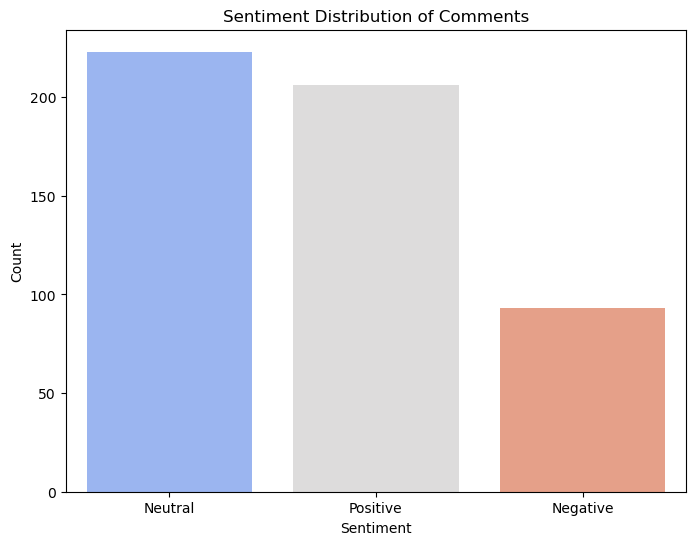

In [8]:
#plot the sentiment bar graph oof data

# Set up the figure size
plt.figure(figsize=(8, 6))


sns.countplot(x='Sentiment', data=data, palette='coolwarm')


plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment') 
plt.ylabel('Count') 

# Show the plot
plt.show()


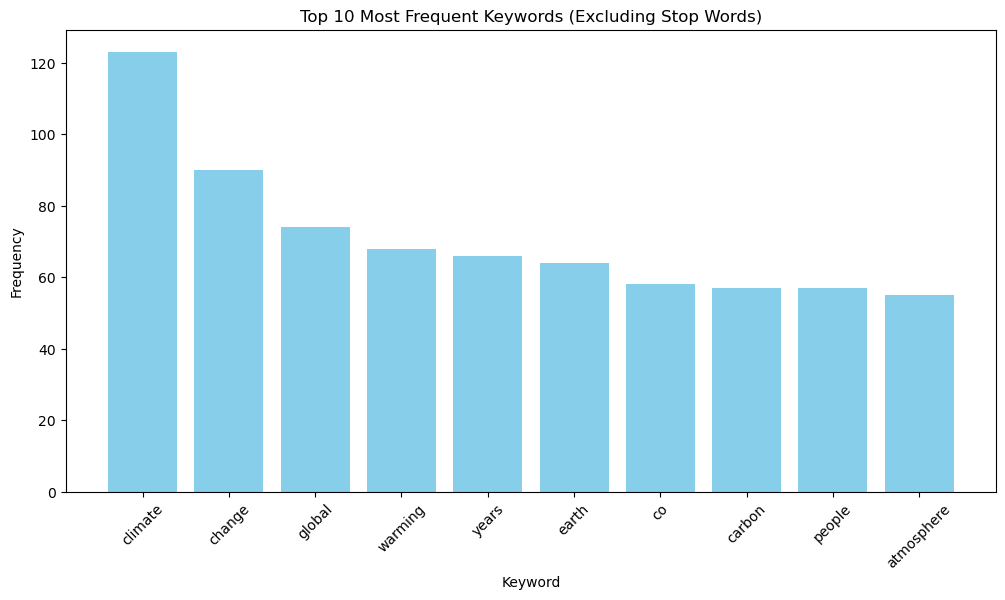

In [9]:
#create a bar chart for most used keywords in texts 

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

all_keywords = []


for text in data['text']:
    
    keywords = text.split()
    
    filtered_keywords = [word for word in keywords if word.lower() not in stop_words]
    all_keywords.extend(filtered_keywords)


keyword_counts = Counter(all_keywords)


most_common_keywords = keyword_counts.most_common(10)


words, counts = zip(*most_common_keywords)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Keywords (Excluding Stop Words)')
plt.xticks(rotation=45)
plt.show()

In [10]:
#calculating average likes and coments for every sentiment

avg_likes=data.groupby('Sentiment')['likesCount'].mean()
avg_comments=data.groupby('Sentiment')['commentsCount'].mean()

print("average likes per sentiment:")
print(avg_likes)

print("\n average comments per sentiment:")
print(avg_comments)


average likes per sentiment:
Sentiment
Negative    5.494624
Neutral     2.309417
Positive    6.980583
Name: likesCount, dtype: float64

 average comments per sentiment:
Sentiment
Negative    11.416667
Neutral      6.882353
Positive     8.909910
Name: commentsCount, dtype: float64


In [11]:
# last check before saving the file 
print(data)

                         date  likesCount  commentsCount  \
0    2022-09-07T17:12:32.000Z           2            NaN   
1    2022-09-08T14:51:13.000Z           0            NaN   
2    2022-09-07T17:19:41.000Z           1            3.0   
3    2022-09-08T00:51:30.000Z           4            NaN   
4    2022-09-07T19:06:20.000Z          16           26.0   
..                        ...         ...            ...   
517  2022-12-22T17:21:37.000Z           0            NaN   
518  2022-12-22T17:19:51.000Z           1            5.0   
519  2022-12-22T17:12:57.000Z           3            NaN   
520  2022-12-22T17:01:12.000Z           1            NaN   
521  2022-12-22T17:00:08.000Z          12            1.0   

                                                  text Sentiment  
0    neat comparison i have not heard it before\n i...   Neutral  
1    an excellent way to visualise the invisible th...  Positive  
2    does the coghg in the troposphere affect the s...   Neutral  
3    excell

In [12]:
# saving the edited file...
data.to_csv('comments_wth_estimation.csv',index=False)